# Greedy algorithm (100 x 1,000)

In [1]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import random
import math
import scipy
from scipy import stats
from random import choice
import networkx as nx
import json
from networkx.readwrite import json_graph
import line_profiler
import IPython
ip = IPython.get_ipython()
ip.define_magic('lprun', line_profiler.magic_lprun)
import json

In [2]:
import findspark
import os
findspark.init()
import pyspark
sc = pyspark.SparkContext()

In [3]:
# Load network graph
with open("graph/nc_mini.json", "r") as graph_data:
    graph_data = json.load(graph_data)
    NC_digraph = json_graph.node_link_graph(graph_data)

In [4]:
def activateNodesOptGreedy(detStartNodes):

    nx.set_node_attributes(NC_digraph, 'activated', False)
    nx.set_node_attributes(NC_digraph, 'explored', False)
    
    activated = 0
    nodes = []
    
    for n in detStartNodes:
        nodes.append(n)
        NC_digraph.node[n]['activated'] = True
        activated = activated + 1
    
    start = nodes[0]

    while len(nodes)>0:

        startNode = nodes[0]

        if NC_digraph.node[startNode]['explored']==False:

            NC_digraph.node[startNode]['explored'] = True

            successors = []

            for succNode in NC_digraph.succ[startNode]:

                if NC_digraph.node[succNode]['activated']==False:

                    alpha = NC_digraph[startNode][succNode]['weight']
                    beta = NC_digraph.node[succNode]['review_count']

                    randUnif = random.uniform(0,1)
                    randBeta = np.sqrt(random.beta(alpha, beta))

                    if randUnif < randBeta:
                        NC_digraph.node[succNode]['activated'] = True
                        successors.append(succNode)
                        activated = activated + 1

        nodes = nodes[1:]
        nodes = nodes + successors

    return activated

def activateNodesLoopGreedy(N, startNodes):
    
    random.seed()
    searchNodes = NC_digraph.nodes()
    actNodeOpt = []
    
    for s in range(startNodes):
        maxActNode = 0
        maxActNodeStart = []

        for n in searchNodes:
            detStartNodes = actNodeOpt + [n]
            result = []
            for r in xrange(N):
                result.append(float(activateNodesOptGreedy(detStartNodes)))
            act = np.mean(result)
            if act>maxActNode:
                maxActNode = act
                maxActNodeStart = n
            
        searchNodes.remove(maxActNodeStart)
        actNodeOpt.append(maxActNodeStart)
    
    return actNodeOpt, maxActNode
            

Run for greedy (30x) on N = 100, 250, 500, 750, 1,000:

In [16]:
# N = 100

start = 1
noRuns = 30
greedyN = 100
runs = sc.parallelize(range(start, start + noRuns))
results = runs.map(lambda x: (x, activateNodesLoopGreedy(greedyN, 3)))
results_list = results.collect()
fd = open("data/greedy-" + str(noRuns) + "x-N=" + str(greedyN) + ".json","w")
json.dump(results_list, fd)
fd.close()
del results

In [36]:
# N = 250

start = 1
noRuns = 30
greedyN = 250
runs = sc.parallelize(range(start, start + noRuns))
results = runs.map(lambda x: (x, activateNodesLoopGreedy(greedyN, 3)))
results_list = results.collect()
fd = open("data/greedy-" + str(noRuns) + "x-N=" + str(greedyN) + ".json","w")
json.dump(results_list, fd)
fd.close()
del results

In [5]:
# N = 500

start = 1
noRuns = 30
greedyN = 500
runs = sc.parallelize(range(start, start + noRuns))
results = runs.map(lambda x: (x, activateNodesLoopGreedy(greedyN, 3)))
results_list = results.collect()
fd = open("data/greedy-" + str(noRuns) + "x-N=" + str(greedyN) + ".json","w")
json.dump(results_list, fd)
fd.close()
del results

In [5]:
# N = 750

start = 1
noRuns = 30
greedyN = 750
runs = sc.parallelize(range(start, start + noRuns))
results = runs.map(lambda x: (x, activateNodesLoopGreedy(greedyN, 3)))
results_list = results.collect()
fd = open("data/greedy-" + str(noRuns) + "x-N=" + str(greedyN) + ".json","w")
json.dump(results_list, fd)
fd.close()
del results

In [6]:
# N = 1000

start = 1
noRuns = 30
greedyN = 1000
runs = sc.parallelize(range(start, start + noRuns))
results = runs.map(lambda x: (x, activateNodesLoopGreedy(greedyN, 3)))
results_list = results.collect()
fd = open("data/greedy-" + str(noRuns) + "x-N=" + str(greedyN) + ".json","w")
json.dump(results_list, fd)
fd.close()
del results

Reload data from JSON files and plot:

In [7]:
noRuns = 30

graph_axis = []
graph_data = []

for greedyN in [100, 250, 500, 750, 1000]:
    
    with open("data/greedy-" + str(noRuns) + "x-N=" + str(greedyN) + ".json", "r") as fd:
        results = json.load(fd)
        
    actNodes = [r[1][1] for r in results]
    graph_axis.append(greedyN)
    graph_data.append(min(actNodes)/max(actNodes))

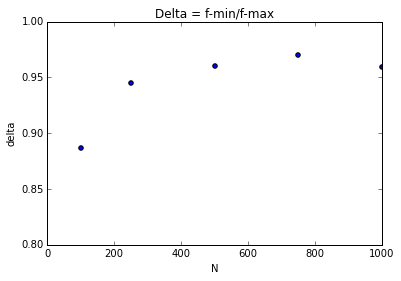

In [8]:
plt.scatter(graph_axis, graph_data)
plt.xlim(0, 1000)
plt.ylim(0.8, 1)
plt.xlabel('N')
plt.ylabel('delta')
plt.title('Delta = f-min/f-max')
plt.show()